In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [4]:
# check the shape
train_data.shape, train_labels[0].shape

((60000, 28, 28), ())

In [5]:
len(train_data)

60000

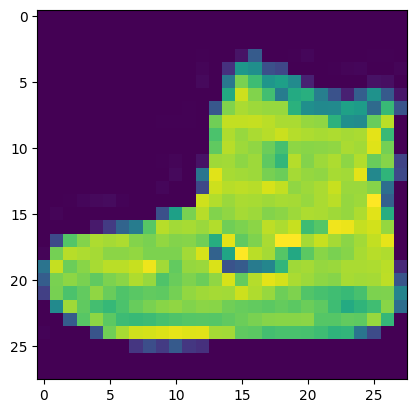

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0]);

In [7]:
# check out samples label
train_labels[0]

9

In [8]:
# Create a small list so we can index onto our traing labels
class_names = ['T-shirt/top', 
               'Trouser',
               'Pulover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot'
]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

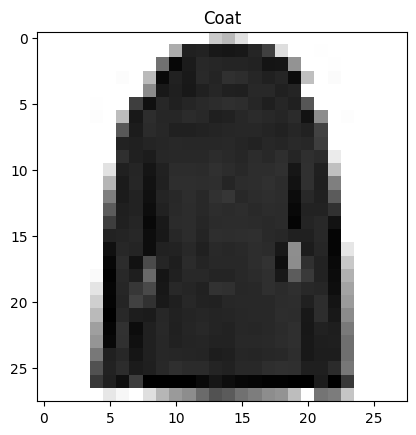

In [9]:
# plot an exmple image and its labels
plt.imshow(train_data[2000], cmap=plt.cm.binary)
plt.title(class_names[train_labels[2000]])

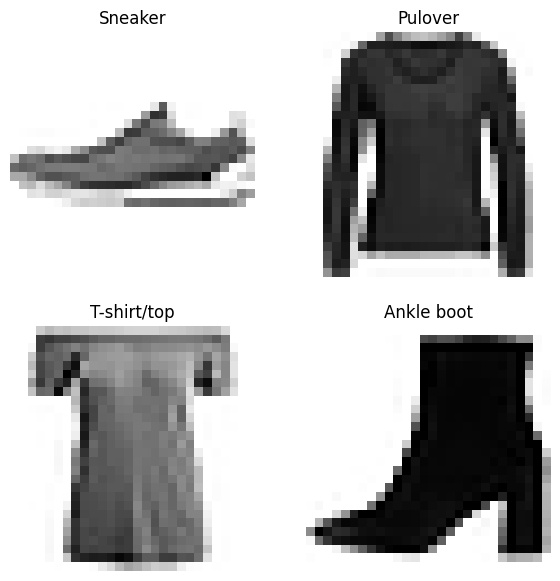

In [10]:
# plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


In [11]:
train_data.shape

(60000, 28, 28)

In [12]:
train_labels.shape

(60000,)

In [13]:
# build the mutliclass model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 2.1995 - accuracy: 0.2964 - val_loss: 1.5996 - val_accuracy: 0.3649
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5115 - accuracy: 0.3763 - val_loss: 1.4885 - val_accuracy: 0.3989
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4172 - accuracy: 0.4117 - val_loss: 1.4047 - val_accuracy: 0.4218
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2642 - accuracy: 0.4713 - val_loss: 1.2162 - val_accuracy: 0.4925
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1780 - accuracy: 0.4952 - val_loss: 1.1839 - val_accuracy: 0.4713
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1380 - accuracy: 0.5108 - val_loss: 1.1469 - val_accuracy: 0.5536
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0844 - accuracy: 0.5347 - val_loss: 1.1011 - val_accurac

In [14]:
# check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
# normalize the data
train_data_norm = train_data / 255
test_data_norm = test_data / 255

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [16]:
# build the mutliclass model
tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model_norm.fit(train_data_norm, train_labels, epochs=20,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9944 - accuracy: 0.6249 - val_loss: 0.7626 - val_accuracy: 0.7275
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6825 - accuracy: 0.7518 - val_loss: 0.6512 - val_accuracy: 0.7635
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5992 - accuracy: 0.7802 - val_loss: 0.6193 - val_accuracy: 0.7708
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5692 - accuracy: 0.7910 - val_loss: 0.5852 - val_accuracy: 0.7898
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5531 - accuracy: 0.7983 - val_loss: 0.5848 - val_accuracy: 0.7884
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5408 - accuracy: 0.8058 - val_loss: 0.5742 - val_accuracy: 0.8010
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5316 - accuracy: 0.8116 - val_loss: 0.5676 - val_accuracy:

In [17]:
# finding the ideal learning rate
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_hsitory = model_2.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler]
                              )



Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4661 - accuracy: 0.4123 - val_loss: 1.1560 - val_accuracy: 0.6009 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9906 - accuracy: 0.6359 - val_loss: 0.8816 - val_accuracy: 0.6722 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7688 - accuracy: 0.7293 - val_loss: 0.7525 - val_accuracy: 0.7379 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6849 - accuracy: 0.7637 - val_loss: 0.6910 - val_accuracy: 0.7612 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6471 - accuracy: 0.7751 - val_loss: 0.6516 - val_accuracy: 0.7802 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6191 - accuracy: 0.7858 - val_loss: 0.6376 - val_accuracy: 0.7850 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

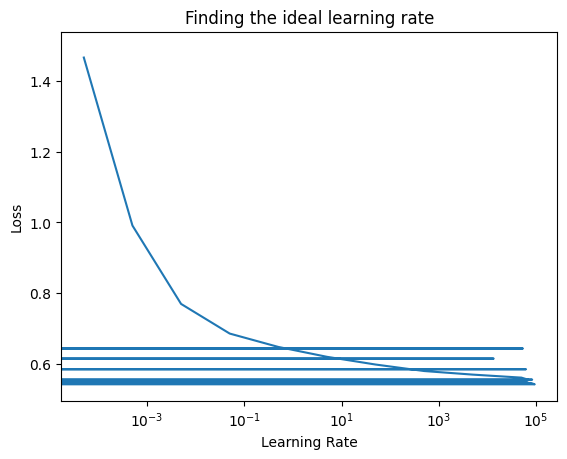

In [18]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**tf.range(40) / 20)
plt.semilogx(lrs, find_lr_hsitory.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [19]:
tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

history = model_norm.fit(train_data_norm, train_labels, epochs=40,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0962 - accuracy: 0.5795 - val_loss: 0.8073 - val_accuracy: 0.7030
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7537 - accuracy: 0.7316 - val_loss: 0.7321 - val_accuracy: 0.7421
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6990 - accuracy: 0.7516 - val_loss: 0.6895 - val_accuracy: 0.7532
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6709 - accuracy: 0.7605 - val_loss: 0.6718 - val_accuracy: 0.7639
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6536 - accuracy: 0.7662 - val_loss: 0.6624 - val_accuracy: 0.7656
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6403 - accuracy: 0.7709 - val_loss: 0.6611 - val_accuracy: 0.7654
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6305 - accuracy: 0.7761 - val_loss: 0.6725 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

history = model_norm.fit(train_data_norm, train_labels, epochs=40,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3493 - accuracy: 0.4903 - val_loss: 1.0345 - val_accuracy: 0.6557
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8769 - accuracy: 0.7197 - val_loss: 0.7809 - val_accuracy: 0.7426
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7150 - accuracy: 0.7632 - val_loss: 0.7008 - val_accuracy: 0.7676
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6673 - accuracy: 0.7775 - val_loss: 0.6766 - val_accuracy: 0.7726
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6440 - accuracy: 0.7817 - val_loss: 0.6577 - val_accuracy: 0.7767
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6275 - accuracy: 0.7853 - val_loss: 0.6435 - val_accuracy: 0.7820
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6172 - accuracy: 0.7879 - val_loss: 0.6694 - val_accuracy: